# 1. Análise RFV (Recência Frequência Valor) - Retail Sales Data

Neste projeto será realizada uma análise do tipo RFV (Recência, Frequência e Valor) com dados que encontrei neste video no Youtube do canal [Jie Jenn](https://www.youtube.com/watch?v=9wxWrERZvss).

## 1.1. Os dados, o problema e os objetivos

A análise RFV é uma técnica de segmentação de clientes muito utilizada em marketing e gestão de relacionamento com clientes (CRM). Ele tem base em três métricas:

- Recência (Recency): O tempo decorrido entre a última compra ou interação de um cliente com a empresa. Clientes mais recentes tem tendência de fazer mais compras do que clientes que não interagem a muito tempo.
- Frequência (Frequency): É o número total de compras ou interações do cliente com a empresa. Clientes com maior frequência de compra, representam aqueles que são fiéis a empresa.
- Valor monetário (Monetary value): Refere-se ao gasto total ou a média de gastos do cliente em suas compras na empresa. Clientes que tem maior média de valores gastos na empresa contribuem de maneira significante com os lucros dela.

Combinando essas três métricas é possível de várias maneiras segmentar os clientes e partir disso criar campanhas de marketing, estratégias de relacionamento e campanhas focada em cada segmento de cliente especifico. 

### Estrutura do dataset
Os dados são de uma rede varejista fictícia que faz entregas internacionais de componentes. As colunas estão organizadas dessa forma:

| Coluna | Descrição|
|--------|----------|
|**OrderNumber**| ID do pedido|
|**Sales Channel**| Canal de vendas do pedido|
|**WarehouseCode**| ID do armazém do pedido|
|**ProcuredDate**|Data de reserva do pedido|
|**OrderDate**|Data da realizaçãod do pedido|
|**ShipDate**|Data de envio|
|**DeliveryDate**|Data de entrega|
|**CurrencyCode**|Moeda utilizada na transação|
|**_SalesTeamID**|ID do time de vendas|
|**_CustomerID**|ID do cliente|
|**_StoreID**|ID da loja|
|**_ProductID**|ID do produto|
|**Order Quantity**|Quantidade de itens no pedido|
|**Discount Applied**|Desconto aplicado na compra|
|**Unit Price**|Preço unitário do produto|
|**Unit Cost**|Custo unitário|

### Objetivos

Com este conjunto de dados em mãos meu objetivo será realizar a análise RFV, com uso do KMeans, e identificar uma segmentação de clientes para ser trabalhada pelo setor de marketing da empresa. 

## 1.2. Importação das bibliotecas e carregamento dos dados

In [157]:
# Bibliotecas para tratar dados
import pandas as pd
import numpy as np
import datetime

# Bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações do Jupyter Notebook
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [158]:
sales_data = pd.read_csv("../data/raw/dados.csv")

# 2. Entendendo os dados

## 2.1. A estrutura do dataframe

In [159]:
print(f"O DataFrame possui {sales_data.shape[0]} linhas e {sales_data.shape[1]} colunas.")

O DataFrame possui 7991 linhas e 16 colunas.


In [160]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numericas = sales_data.select_dtypes(include = numerics)
nao_numericas = sales_data.select_dtypes(exclude = numerics)

print(
    f'Temos {numericas.shape[1]} colunas numéricas e {nao_numericas.shape[1]} colunas não-numéricas'
)

Temos 8 colunas numéricas e 8 colunas não-numéricas


In [161]:
sales_data.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,12/31/2017,5/31/2018,6/14/2018,6/19/2018,USD,6,15,259,12,5,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,12/31/2017,5/31/2018,6/22/2018,7/2/2018,USD,14,20,196,27,3,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,12/31/2017,5/31/2018,6/21/2018,7/1/2018,USD,21,16,213,16,1,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,12/31/2017,5/31/2018,6/2/2018,6/7/2018,USD,28,48,107,23,8,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,4/10/2018,5/31/2018,6/16/2018,6/26/2018,USD,22,49,111,26,8,0.100,1822.4,1476.144


In [162]:
sales_data.tail()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
7986,SO - 0008087,In-Store,WARE-MKL1006,9/26/2020,12/30/2020,1/7/2021,1/14/2021,USD,9,41,339,29,1,0.075,234.5,121.940
7987,SO - 0008088,Online,WARE-NMK1003,9/26/2020,12/30/2020,1/2/2021,1/4/2021,USD,14,29,202,3,6,0.050,3202.6,1921.560
7988,SO - 0008089,Online,WARE-UHY1004,9/26/2020,12/30/2020,1/23/2021,1/26/2021,USD,14,32,241,35,5,0.200,3825.7,2792.761
7989,SO - 0008090,Online,WARE-NMK1003,9/26/2020,12/30/2020,1/20/2021,1/25/2021,USD,20,42,112,36,8,0.100,1072.0,804.000
7990,SO - 0008091,In-Store,WARE-UHY1004,9/26/2020,12/30/2020,1/13/2021,1/19/2021,USD,6,41,237,43,5,0.075,2211.0,1370.820


In [163]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       7991 non-null   object 
 1   Sales Channel     7991 non-null   object 
 2   WarehouseCode     7991 non-null   object 
 3   ProcuredDate      7991 non-null   object 
 4   OrderDate         7991 non-null   object 
 5   ShipDate          7991 non-null   object 
 6   DeliveryDate      7991 non-null   object 
 7   CurrencyCode      7991 non-null   object 
 8   _SalesTeamID      7991 non-null   int64  
 9   _CustomerID       7991 non-null   int64  
 10  _StoreID          7991 non-null   int64  
 11  _ProductID        7991 non-null   int64  
 12  Order Quantity    7991 non-null   int64  
 13  Discount Applied  7991 non-null   float64
 14  Unit Price        7991 non-null   float64
 15  Unit Cost         7991 non-null   float64
dtypes: float64(3), int64(5), object(8)
memory 

## 2.2. Breve conclusões antes de partir para os próximos passos 

- Vou usar somente algumas colunas, portando vou criar um novo dataframe somente com elas;
- Será necessário criar uma coluna para contabilizar o total de receita por pedido;
- Será necessário mudar a coluna "OrderDate" para o dtype datetime;
- O dataframe não possui dados nulos.

# 3. Limpeza e manipulação dos dados

## 3.1. Verificação de nulos e duplicatas 

In [164]:
print(f'O conjunto de dados tem {sales_data.isna().sum().sum()} dados nulos.')

O conjunto de dados tem 0 dados nulos.


In [165]:
print(f'O conjunto de dados tem {sales_data.duplicated().sum()} dados duplicados.')

O conjunto de dados tem 0 dados duplicados.


## 3.2. Manipulação dos dados e colunas

In [166]:
# Criando o dataframe somente com as colunas que vão ser utilizadas
cols = ["_CustomerID", "OrderDate", "Order Quantity", "Discount Applied", "Unit Price", "Unit Cost"]
df = sales_data[cols].copy()
df.head()

,_CustomerID,OrderDate,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,15,5/31/2018,5,0.075,1963.1,1001.181
1,20,5/31/2018,3,0.075,3939.6,3348.660
2,16,5/31/2018,1,0.050,1775.5,781.220
3,48,5/31/2018,8,0.075,2324.9,1464.687
4,49,5/31/2018,8,0.100,1822.4,1476.144


In [167]:
# Ajustando Order Date para datetime
df["OrderDate"] = pd.to_datetime(df["OrderDate"])
df.head()

,_CustomerID,OrderDate,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,15,2018-05-31,5,0.075,1963.1,1001.181
1,20,2018-05-31,3,0.075,3939.6,3348.660
2,16,2018-05-31,1,0.050,1775.5,781.220
3,48,2018-05-31,8,0.075,2324.9,1464.687
4,49,2018-05-31,8,0.100,1822.4,1476.144


In [168]:
# Criando a coluna de Revenue
df["Revenue"] = ((df["Unit Price"] - (df["Unit Price"] * df["Discount Applied"]) - df["Unit Cost"])) * df["Order Quantity"]
df.head()

,_CustomerID,OrderDate,Order Quantity,Discount Applied,Unit Price,Unit Cost,Revenue
0,15,2018-05-31,5,0.075,1963.1,1001.181,4073.4325
1,20,2018-05-31,3,0.075,3939.6,3348.660,886.4100
2,16,2018-05-31,1,0.050,1775.5,781.220,905.5050
3,48,2018-05-31,8,0.075,2324.9,1464.687,5486.7640
4,49,2018-05-31,8,0.100,1822.4,1476.144,1312.1280


In [169]:
# Salvando este dataframe em um novo csv
df.to_csv("../data/ready/dados_modificados.csv")

# 4. Aplicação do KMeans

## 4.1. Ajuste do dados

Antes de prosseguir com a análise primeiro será necessário ajustar os dados e criar um dataset para a análise RFV e a aplicação do KMeans

In [170]:
# Recência

df_recencia = (
    df[["_CustomerID", "OrderDate"]]
    .groupby("_CustomerID")["OrderDate"]
    .agg("max")
    .reset_index()
)

df_recencia.head()

,_CustomerID,OrderDate
0,1,2020-12-23
1,2,2020-12-23
2,3,2020-12-22
3,4,2020-12-27
4,5,2020-12-02


Agrupando o "_CustomerID" por "OrderDate" agregado por seu valor máximo, é possível identificar a data da última compra do cliente. O próximo passo é calcular a recência em dias.

In [171]:
cur_time = df_recencia["OrderDate"].max()

def days_diff(cur_time, datetime_val):
    return (cur_time - datetime_val).days

In [172]:
df_recencia["Recencia"] = df_recencia["OrderDate"].apply(lambda datetime_val: days_diff(cur_time, datetime_val))
df_recencia.head()

,_CustomerID,OrderDate,Recencia
0,1,2020-12-23,7
1,2,2020-12-23,7
2,3,2020-12-22,8
3,4,2020-12-27,3
4,5,2020-12-02,28


In [173]:
# Removendo "OrderDate"

df_recencia = df_recencia.drop("OrderDate", axis = 1)

Vamos visualizar algumas coisas sobre a recência

In [174]:
df_recencia["Recencia"].describe()

count    50.000000
mean      5.100000
std       5.395576
min       0.000000
25%       2.000000
50%       3.000000
75%       7.000000
max      28.000000
Name: Recencia, dtype: float64

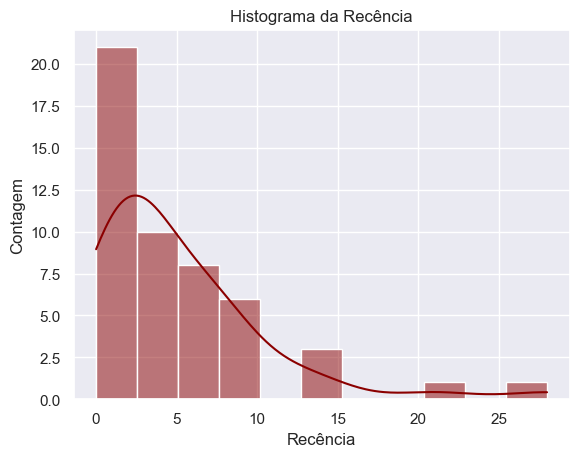

In [175]:
sns.histplot(df_recencia, x = "Recencia", kde = True, color = "darkred")
plt.title("Histograma da Recência")
plt.xlabel("Recência")
plt.ylabel("Contagem")
plt.show()

Os valores de recência mais recorrentes estão entre 0 e 5 dias, mas temos clientes que estão até com de 25 dias sem realizar nenhuma compra na empresa, provavelmente estes estão em um ponto de churn, ou seja, de abandonar a empresa, vale ressaltar que é natural que ao longo do tempo o número de de compras caia. Agora vamos processeguir para Frequência e Valor. 

In [176]:
df_fv = df[["_CustomerID", "Order Quantity", "Revenue"]]

df_fv = (
    df_fv.groupby("_CustomerID")[["Order Quantity", "Revenue"]]
    .agg({"Order Quantity": "count", "Revenue": "mean"})
    .reset_index()
)

df_fv = df_fv.rename(columns = {"Order Quantity": "Frequencia", 
                                "Revenue": "Valor"})

df_fv["Valor"] = df_fv["Valor"].round(2)

df_fv.head()

,_CustomerID,Frequencia,Valor
0,1,152,2210.09
1,2,135,2425.25
2,3,181,2575.80
3,4,167,3155.58
4,5,159,2802.72


Agrupando "_CustomerID" pela contagem de "Order Quantity" foi possível contar quantas vezes cada ID realizou uma compra ou seja a Frequência, e agrupando pela média de "Revenue" conseguimos nosso Valor monetário. Com isso o próximo passo é unir os dataframes.

In [177]:
df_rfv = df_recencia.merge(df_fv, on = "_CustomerID", how = "left")
df_rfv = df_rfv.fillna(0)
df_rfv.head()

,_CustomerID,Recencia,Frequencia,Valor
0,1,7,152,2210.09
1,2,7,135,2425.25
2,3,8,181,2575.80
3,4,3,167,3155.58
4,5,28,159,2802.72


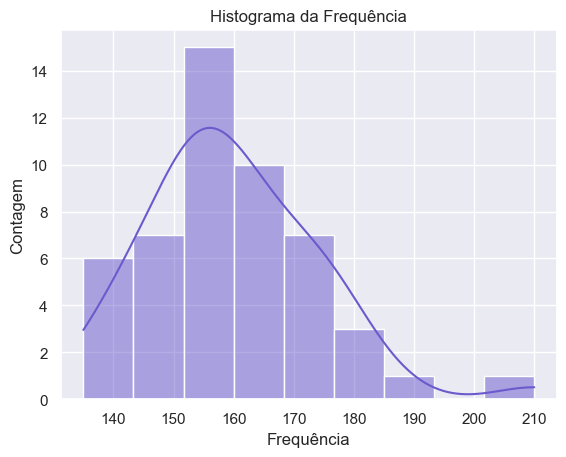

In [178]:
sns.histplot(df_rfv, x = "Frequencia", kde = True, color = "slateblue")
plt.title("Histograma da Frequência")
plt.xlabel("Frequência")
plt.ylabel("Contagem")
plt.show()

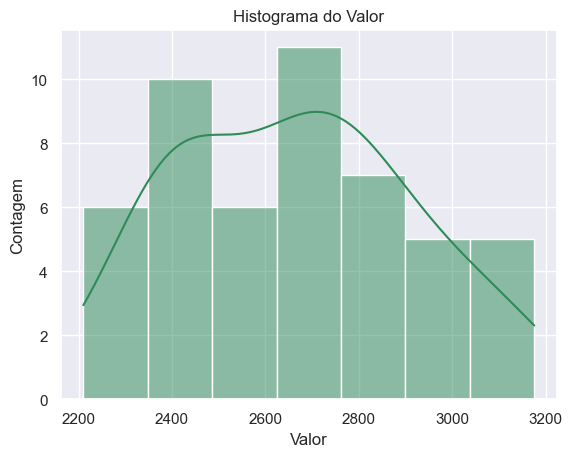

In [179]:
sns.histplot(df_rfv, x = "Valor", kde = True, color = "seagreen")
plt.title("Histograma do Valor")
plt.xlabel("Valor")
plt.ylabel("Contagem")
plt.show()

In [180]:
df_rfv.describe()

,_CustomerID,Recencia,Frequencia,Valor
count,50.00000,50.000000,50.00000,50.00000
mean,25.50000,5.100000,159.82000,2663.37080
std,14.57738,5.395576,14.23088,251.29131
min,1.00000,0.000000,135.00000,2210.09000
25%,13.25000,2.000000,151.25000,2436.21250
50%,25.50000,3.000000,157.50000,2666.38000
75%,37.75000,7.000000,167.75000,2826.41750
max,50.00000,28.000000,210.00000,3175.92000


A maior diferença entre os clientes está na recência e frequência de compras, os valores gastos na empresa estão em médias próximas. 

## 4.2. Pré-processamento dos dados e definição do número de clusters

### Utilizando o StandardScaler para deixar os dados na mesma escala

In [181]:
from sklearn.preprocessing import StandardScaler

feature_cols = ["Recencia", "Frequencia", "Valor"]

standardized_data = df_rfv.copy()

scaler = StandardScaler()

scaler.fit(df_rfv[feature_cols])

standardized_features = scaler.transform(df_rfv[feature_cols])
standardized_data[feature_cols] = standardized_features

### Definindo o número de Clusters através do método do "cotovelo"

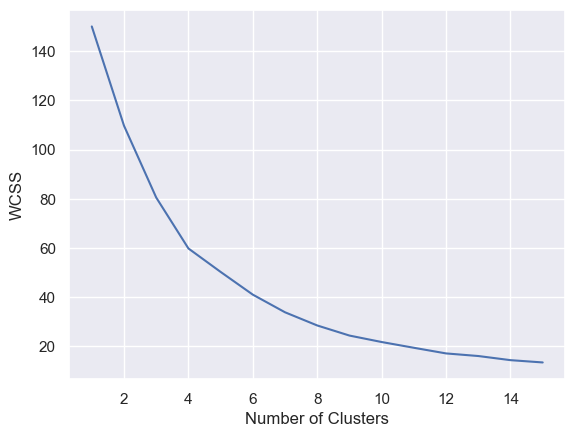

In [182]:
from sklearn.cluster import KMeans

X = standardized_data.iloc[:, [1, 2, 3]].values
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 21)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 16), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

O "cotovelo" da nossa curva indica que devemos utilizar 4 clusters. 

## 4.3. Aplicando a clusterização através do KMeans

In [183]:
kmeans = KMeans(n_clusters = 4, random_state = 21)
kmeans.fit(standardized_data[feature_cols])

df_rfv["Cluster"] = kmeans.labels_
df_rfv.head()

,_CustomerID,Recencia,Frequencia,Valor,Cluster
0,1,7,152,2210.09,3
1,2,7,135,2425.25,3
2,3,8,181,2575.80,1
3,4,3,167,3155.58,2
4,5,28,159,2802.72,0


### Boxplots dos Clusters

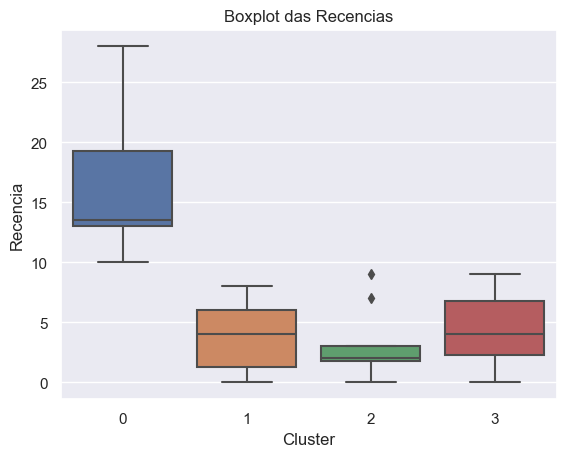

In [184]:
sns.boxplot(df_rfv, x = "Cluster", y = "Recencia")
plt.title("Boxplot das Recencias")
plt.show()

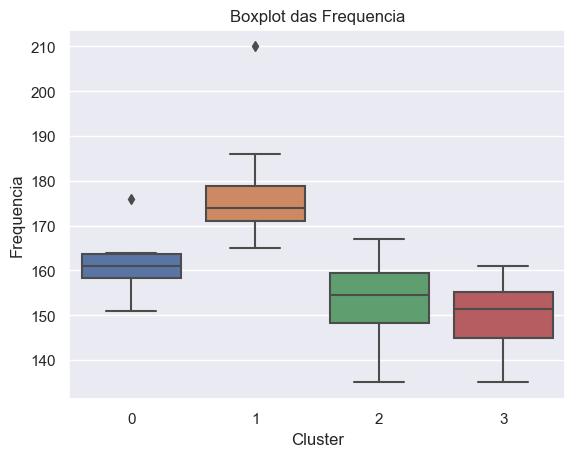

In [185]:
sns.boxplot(df_rfv, x = "Cluster", y = "Frequencia")
plt.title("Boxplot das Frequencia")
plt.show()

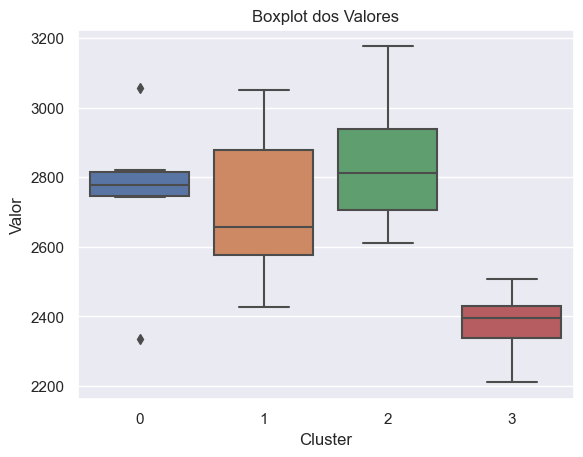

In [186]:
sns.boxplot(df_rfv, x = "Cluster", y = "Valor")
plt.title("Boxplot dos Valores")
plt.show()

### Definção da Segmentação 

In [187]:
centroid_df = (
    df_rfv.groupby("Cluster")[["_CustomerID", "Recencia", "Frequencia", "Valor"]]
    .agg(
        {
            "_CustomerID": "nunique",
            "Recencia": "mean",
            "Frequencia": "mean",
            "Valor": "mean"
        }
    )
    .reset_index()
)

centroid_df = centroid_df.rename(columns = {"_CustomerID": "Número de Clientes"})

centroid_df.head()

,Cluster,Número de Clientes,Recencia,Frequencia,Valor
0,0,6,16.500000,161.833333,2751.973333
1,1,14,3.785714,176.571429,2701.735000
2,2,16,2.625000,153.000000,2844.886875
3,3,14,4.357143,150.000000,2379.587143


- Cluster 0: Recência muito baixa, frequência baixa, valor baixo. Estes clientes vou classificar como Possível Churn.
- Cluster 1: Recência média, frequência alta, valor médio. Estes clientes vou classificar como Cliente Importante.
- Cluster 2: Recência alta, frequência baixa, valor alto. Estes clientes vou classificar como Cliente com Potencial.
- Cluster 3: Recência baixa, frequência muito baixa, valor muito baixo. Estes clientes vou classificar estes clientes como Precisa de Atenção. 

In [188]:
seg_map = ["Possível Churn", "Cliente Importante", "Cliente com Potencial", "Precisa de Atenção"]

centroid_df["Segmento"] = seg_map
centroid_df.head()

,Cluster,Número de Clientes,Recencia,Frequencia,Valor,Segmento
0,0,6,16.500000,161.833333,2751.973333,Possível Churn
1,1,14,3.785714,176.571429,2701.735000,Cliente Importante
2,2,16,2.625000,153.000000,2844.886875,Cliente com Potencial
3,3,14,4.357143,150.000000,2379.587143,Precisa de Atenção


In [189]:
def segment(value):
    if value == 0:
        return "Possível Churn"
    elif value == 1:
        return "Cliente Importante"
    elif value == 2:
        return "Cliente com Potencial"
    else:
        return "Precisa de Atenção"

In [190]:
df_rfv["Segmento"] = df_rfv["Cluster"].apply(segment)
df_rfv.head()

,_CustomerID,Recencia,Frequencia,Valor,Cluster,Segmento
0,1,7,152,2210.09,3,Precisa de Atenção
1,2,7,135,2425.25,3,Precisa de Atenção
2,3,8,181,2575.80,1,Cliente Importante
3,4,3,167,3155.58,2,Cliente com Potencial
4,5,28,159,2802.72,0,Possível Churn


In [191]:
# Salvando o dataset devidamente segmentado
df.to_csv("../data/ready/dados_rfv.csv")

# 5. Conclusões

![Warehouse](https://images.unsplash.com/photo-1590247813693-5541d1c609fd?q=80&w=2109&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D)

Ao fim, conseguimos gerar um dataset com uma segmentação bastante útil para o time de marketing tornando possível criar dashboards e campanhas diretamente focadas a clientes como por exemplo:

- Uma campanha focada em reverter a possível situação de Churn dos clientes nesta segmentação. Propaganda negativa é muito mais efetiva que a positiva, especialmente em tempos de redes sociais, garantir um bom pós-venda e relacionamento com clientes é muito importante em qualquer sertor;
- Campanhas com descontos e outras formas de ativar os clientes com potencial, e fazer com que eles consumam mais produtos (é de entedimentos como este que você recebe aqueles e-mails de grandes lojas e varejistas online);
- Clientes que precisam de atenção, entram na mesmo caso de clientes em possível Churn, campanhas que ativem estes clientes e façam eles se sentirem "lembrados".
- Clientes importantes devem ter tratamento melhor, e acesso a desconto e métodos para aumentar sua fidelização junto a empresa. 